0.936501083115


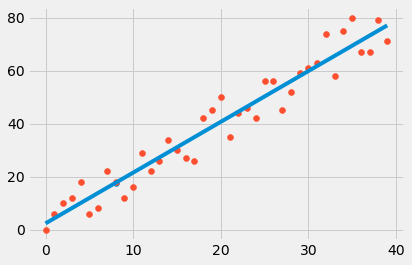

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slop_and_intercept(xs,ys):
    m = ( ((mean(xs)*mean(ys)) - mean(xs*ys))/((mean(xs)**2) -(mean(xs**2))))
    
    b = mean(ys) - m * mean(xs)
    
    return m,b


def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/ squared_error_y_mean)

xs ,ys  = create_dataset(40,10,2,correlation='pos')

m, b = best_fit_slop_and_intercept(xs, ys)


regression_line = [(m*x)+b for x in xs]
predict_x = 8
predict_y = 8*m+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)
    
plt.scatter(predict_x,predict_y)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()